In [ ]:
!pip install google-play-scraper
!pip install app-store-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.6
    Uninstalling urllib3-2.0.6:
      Successfully uninstalled urllib3-2.0.6
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into acc

In [ ]:
from google_play_scraper import app, Sort, reviews_all

import pandas as pd
import numpy as np
import json, os, uuid

# Define the app package name
app_package_name = 'io.cred.roboapp.android'

# Get app information to obtain the current app rating
app_info = app(app_package_name, lang='en', country='us')

# Extract the current app rating
app_rating = app_info['score']

# Get reviews for the app
googleReviews = reviews_all(
    app_package_name,
    sleep_milliseconds=0,
    lang='en',
    country='us',
    sort=Sort.NEWEST,
)

# Create a list of dictionaries with review and rating
review_data = [{'review': review['content'], 'rating': review['score']} for review in googleReviews]

# Create a DataFrame from the list of review data
google_df = pd.DataFrame(review_data)

# Save the DataFrame to a CSV file
google_df.to_csv('gReview.csv')





In [ ]:
import pandas as pd

# Load the CSV data into a DataFrame
df = pd.read_csv('gReview.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df

,Unnamed: 0,review,rating
0,0,Worse card by far,1
1,1,It took 16 months but my credit score is up ov...,5
2,2,"Love the card and everything, but half the tim...",1
3,3,. ... ... .... ............. .... .. . . . .j.,3
4,4,"Love the bank, but the app crashes and asks fo...",3
...,...,...,...
420,420,Doesn't work!! THE APP IS BUSTED for galaxy S2...,1
421,421,"App is a joke, works 1/5 times, the rest of th...",2
422,422,"Is not working, stuck on the intro screen. Ple...",1
423,423,Doesn't log in on Android. Shows incorrect pas...,1


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string


# Download NLTK stopwords if you haven't already
nltk.download('stopwords')
nltk.download('punkt')

# Download NLTK stopwords if you haven't already
# nltk.download('stopwords')

# Load your DataFrame (replace 'df' with the actual DataFrame name)
# Assuming your DataFrame has a 'review' column
# Replace 'review' with the actual column name if it's different

def process_text(text):
    # Remove special characters and digits
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word.lower() not in stopwords.words('english')]

    return ' '.join(words)

df['review'] = df['review'].apply(process_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df

,Unnamed: 0,review,rating
0,0,Worse card far,1
1,1,took months credit score points Ive never used...,5
2,2,Love card everything half time app wont open R...,1
3,3,j,3
4,4,Love bank app crashes asks many updates wont u...,3
...,...,...,...
420,420,Doesnt work APP BUSTED galaxy Ultra cant ever ...,1
421,421,App joke works times rest time shows blank whi...,2
422,422,working stuck intro screen Please fix,1
423,423,Doesnt log Android Shows incorrect password op...,1


In [ ]:
df['review'] = df['review'].str.lower()

In [ ]:
df

,Unnamed: 0,review,rating
0,0,worse card far,1
1,1,took months credit score points ive never used...,5
2,2,love card everything half time app wont open r...,1
3,3,j,3
4,4,love bank app crashes asks many updates wont u...,3
...,...,...,...
420,420,doesnt work app busted galaxy ultra cant ever ...,1
421,421,app joke works times rest time shows blank whi...,2
422,422,working stuck intro screen please fix,1
423,423,doesnt log android shows incorrect password op...,1


In [ ]:
df=df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

,review,rating
0,worse card far,1
1,took months credit score points ive never used...,5
2,love card everything half time app wont open r...,1
3,j,3
4,love bank app crashes asks many updates wont u...,3


In [ ]:
df['rating'].value_counts()

1    184
5    100
2     55
3     53
4     33
Name: rating, dtype: int64

QUICK EDA

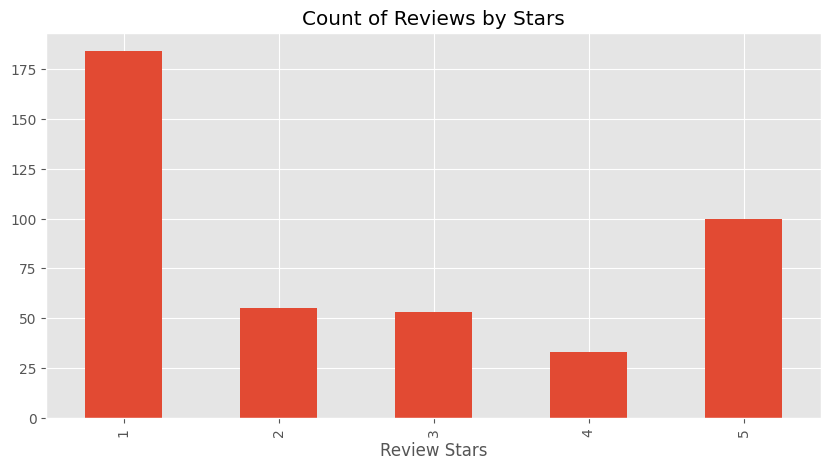

In [ ]:
ax=df['rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

Basic NLTK

In [ ]:
example=df['review'][50]
print(example)

downloaded app everything supposed got point needed transfer funds main bank account service cant called emergency support told send service department get answer doesnt make sense app service cant use update fixed issue sent waiting card come update point


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['downloaded',
 'app',
 'everything',
 'supposed',
 'got',
 'point',
 'needed',
 'transfer',
 'funds',
 'main']

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('downloaded', 'VBN'),
 ('app', 'RP'),
 ('everything', 'NN'),
 ('supposed', 'VBD'),
 ('got', 'VBD'),
 ('point', 'NN'),
 ('needed', 'VBN'),
 ('transfer', 'NN'),
 ('funds', 'NNS'),
 ('main', 'JJ')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  downloaded/VBN
  app/RP
  everything/NN
  supposed/VBD
  got/VBD
  point/NN
  needed/VBN
  transfer/NN
  funds/NNS
  main/JJ
  bank/NN
  account/NN
  service/NN
  cant/NN
  called/VBD
  emergency/NN
  support/NN
  told/VBD
  send/JJ
  service/NN
  department/NN
  get/VB
  answer/JJR
  doesnt/NNS
  make/VBP
  sense/NN
  app/NN
  service/NN
  cant/NN
  use/NN
  update/JJ
  fixed/VBN
  issue/NN
  sent/VBD
  waiting/VBG
  card/NN
  come/NN
  update/JJ
  point/NN)


Step 1. VADER SENTIMENTAL SCORING

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
example

'downloaded app everything supposed got point needed transfer funds main bank account service cant called emergency support told send service department get answer doesnt make sense app service cant use update fixed issue sent waiting card come update point'

In [ ]:
sia.polarity_scores(example)

{'neg': 0.054, 'neu': 0.893, 'pos': 0.053, 'compound': -0.0191}

In [ ]:
#run the polarity score on the entire dataset
df

,review,rating
0,worse card far,1
1,took months credit score points ive never used...,5
2,love card everything half time app wont open r...,1
3,j,3
4,love bank app crashes asks many updates wont u...,3
...,...,...
420,doesnt work app busted galaxy ultra cant ever ...,1
421,app joke works times rest time shows blank whi...,2
422,working stuck intro screen please fix,1
423,doesnt log android shows incorrect password op...,1


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'google_df'
df['Id'] = range(1, len(df) + 1)

# If you want the index column to start from 0, you can use the following line instead:
# google_df['index'] = range(len(google_df))

# Now, your DataFrame 'google_df' will have an 'index' column with values from 1 to 422 (or 0 to 421).

In [ ]:
df

,review,rating,Id
0,worse card far,1,1
1,took months credit score points ive never used...,5,2
2,love card everything half time app wont open r...,1,3
3,j,3,4
4,love bank app crashes asks many updates wont u...,3,5
...,...,...,...
420,doesnt work app busted galaxy ultra cant ever ...,1,421
421,app joke works times rest time shows blank whi...,2,422
422,working stuck intro screen please fix,1,423
423,doesnt log android shows incorrect password op...,1,424


In [ ]:
df

,review,rating,Id
0,worse card far,1,1
1,took months credit score points ive never used...,5,2
2,love card everything half time app wont open r...,1,3
3,j,3,4
4,love bank app crashes asks many updates wont u...,3,5
...,...,...,...
420,doesnt work app busted galaxy ultra cant ever ...,1,421
421,app joke works times rest time shows blank whi...,2,422
422,working stuck intro screen please fix,1,423
423,doesnt log android shows incorrect password op...,1,424


In [ ]:
res={}
for i, row in tqdm(df.iterrows(), total=len(df)):
  r= row['review']
  myid= row['Id']
  res[myid]= sia.polarity_scores(r)




  0%|          | 0/425 [00:00<?, ?it/s]

In [ ]:
res

{1: {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767},
 2: {'neg': 0.084, 'neu': 0.708, 'pos': 0.207, 'compound': 0.5423},
 3: {'neg': 0.138, 'neu': 0.691, 'pos': 0.171, 'compound': 0.204},
 4: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.065, 'neu': 0.692, 'pos': 0.242, 'compound': 0.6808},
 6: {'neg': 0.175, 'neu': 0.599, 'pos': 0.226, 'compound': 0.2892},
 7: {'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.5719},
 8: {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588},
 9: {'neg': 0.123, 'neu': 0.456, 'pos': 0.421, 'compound': 0.7832},
 10: {'neg': 0.019, 'neu': 0.603, 'pos': 0.378, 'compound': 0.9719},
 11: {'neg': 0.075, 'neu': 0.793, 'pos': 0.133, 'compound': 0.3597},
 12: {'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'compound': 0.743},
 13: {'neg': 0.35, 'neu': 0.485, 'pos': 0.164, 'compound': -0.7845},
 14: {'neg': 0.115, 'neu': 0.814, 'pos': 0.071, 'compound': -0.1695},
 15: {'neg': 0.201, 'neu': 0.706, 'pos': 0.093, 'compound': -0.5

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders

,Id,neg,neu,pos,compound,review,rating
0,1,0.608,0.392,0.000,-0.4767,worse card far,1
1,2,0.084,0.708,0.207,0.5423,took months credit score points ive never used...,5
2,3,0.138,0.691,0.171,0.2040,love card everything half time app wont open r...,1
3,4,0.000,0.000,0.000,0.0000,j,3
4,5,0.065,0.692,0.242,0.6808,love bank app crashes asks many updates wont u...,3
...,...,...,...,...,...,...,...
420,421,0.177,0.751,0.072,-0.5423,doesnt work app busted galaxy ultra cant ever ...,1
421,422,0.000,0.690,0.310,0.5423,app joke works times rest time shows blank whi...,2
422,423,0.241,0.482,0.277,0.0772,working stuck intro screen please fix,1
423,424,0.145,0.855,0.000,-0.1779,doesnt log android shows incorrect password op...,1


PLOT VADER RESULTS

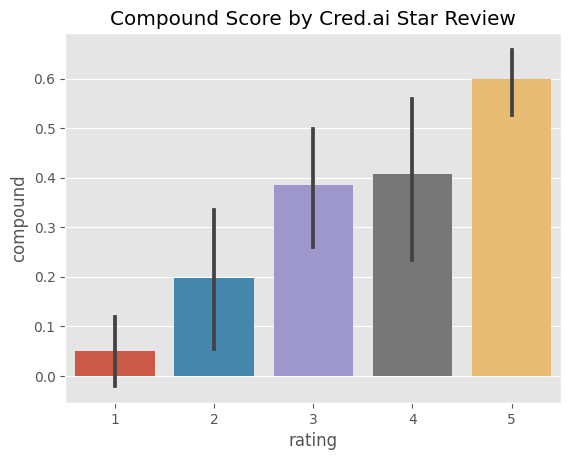

In [ ]:
ax=sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compound Score by Cred.ai Star Review')
plt.show()

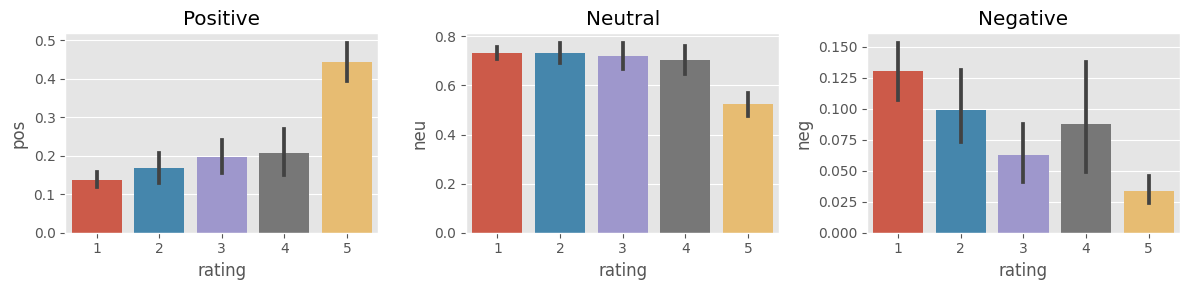

In [ ]:
fig,axs=plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Roberta Pretrained Model

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 18.8 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL= f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model= AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
#vader results
print(example)
sia.polarity_scores(example)

downloaded app everything supposed got point needed transfer funds main bank account service cant called emergency support told send service department get answer doesnt make sense app service cant use update fixed issue sent waiting card come update point


{'neg': 0.054, 'neu': 0.893, 'pos': 0.053, 'compound': -0.0191}

In [ ]:
#Run for roberta model
encoded_text=tokenizer(example, return_tensors='pt')
output= model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores
scores_dict={
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)


{'roberta_neg': 0.8499974, 'roberta_neu': 0.14142427, 'roberta_pos': 0.008578408}


In [ ]:
def polarity_scores_roberta(example):
  encoded_text=tokenizer(example, return_tensors='pt')
  output= model(**encoded_text)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores
  scores_dict={
      'roberta_neg': scores[0],
      'roberta_neu': scores[1],
      'roberta_pos': scores[2]
  }
  return scores_dict

In [ ]:
res={}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    r= row['review']
    myid= row['Id']
    vader_result= sia.polarity_scores(r)
    vader_result_rename={}
    for key, value in vader_result.items():
      vader_result_rename[f'vader_{key}']= value
    roberta_result=polarity_scores_roberta(r)
    both={**vader_result_rename,**roberta_result}
    res[myid]=both
  except RuntimeError:
    print(f'Broke for id{myid}')


  0%|          | 0/425 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,review,rating
0,1,0.608,0.392,0.000,-0.4767,0.881017,0.107987,0.010997,worse card far,1
1,2,0.084,0.708,0.207,0.5423,0.869077,0.121778,0.009145,took months credit score points ive never used...,5
2,3,0.138,0.691,0.171,0.2040,0.967254,0.029775,0.002971,love card everything half time app wont open r...,1
3,4,0.000,0.000,0.000,0.0000,0.208902,0.557491,0.233607,j,3
4,5,0.065,0.692,0.242,0.6808,0.875004,0.112854,0.012142,love bank app crashes asks many updates wont u...,3


Compare scores between models

In [ ]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'review', 'rating'],
      dtype='object')

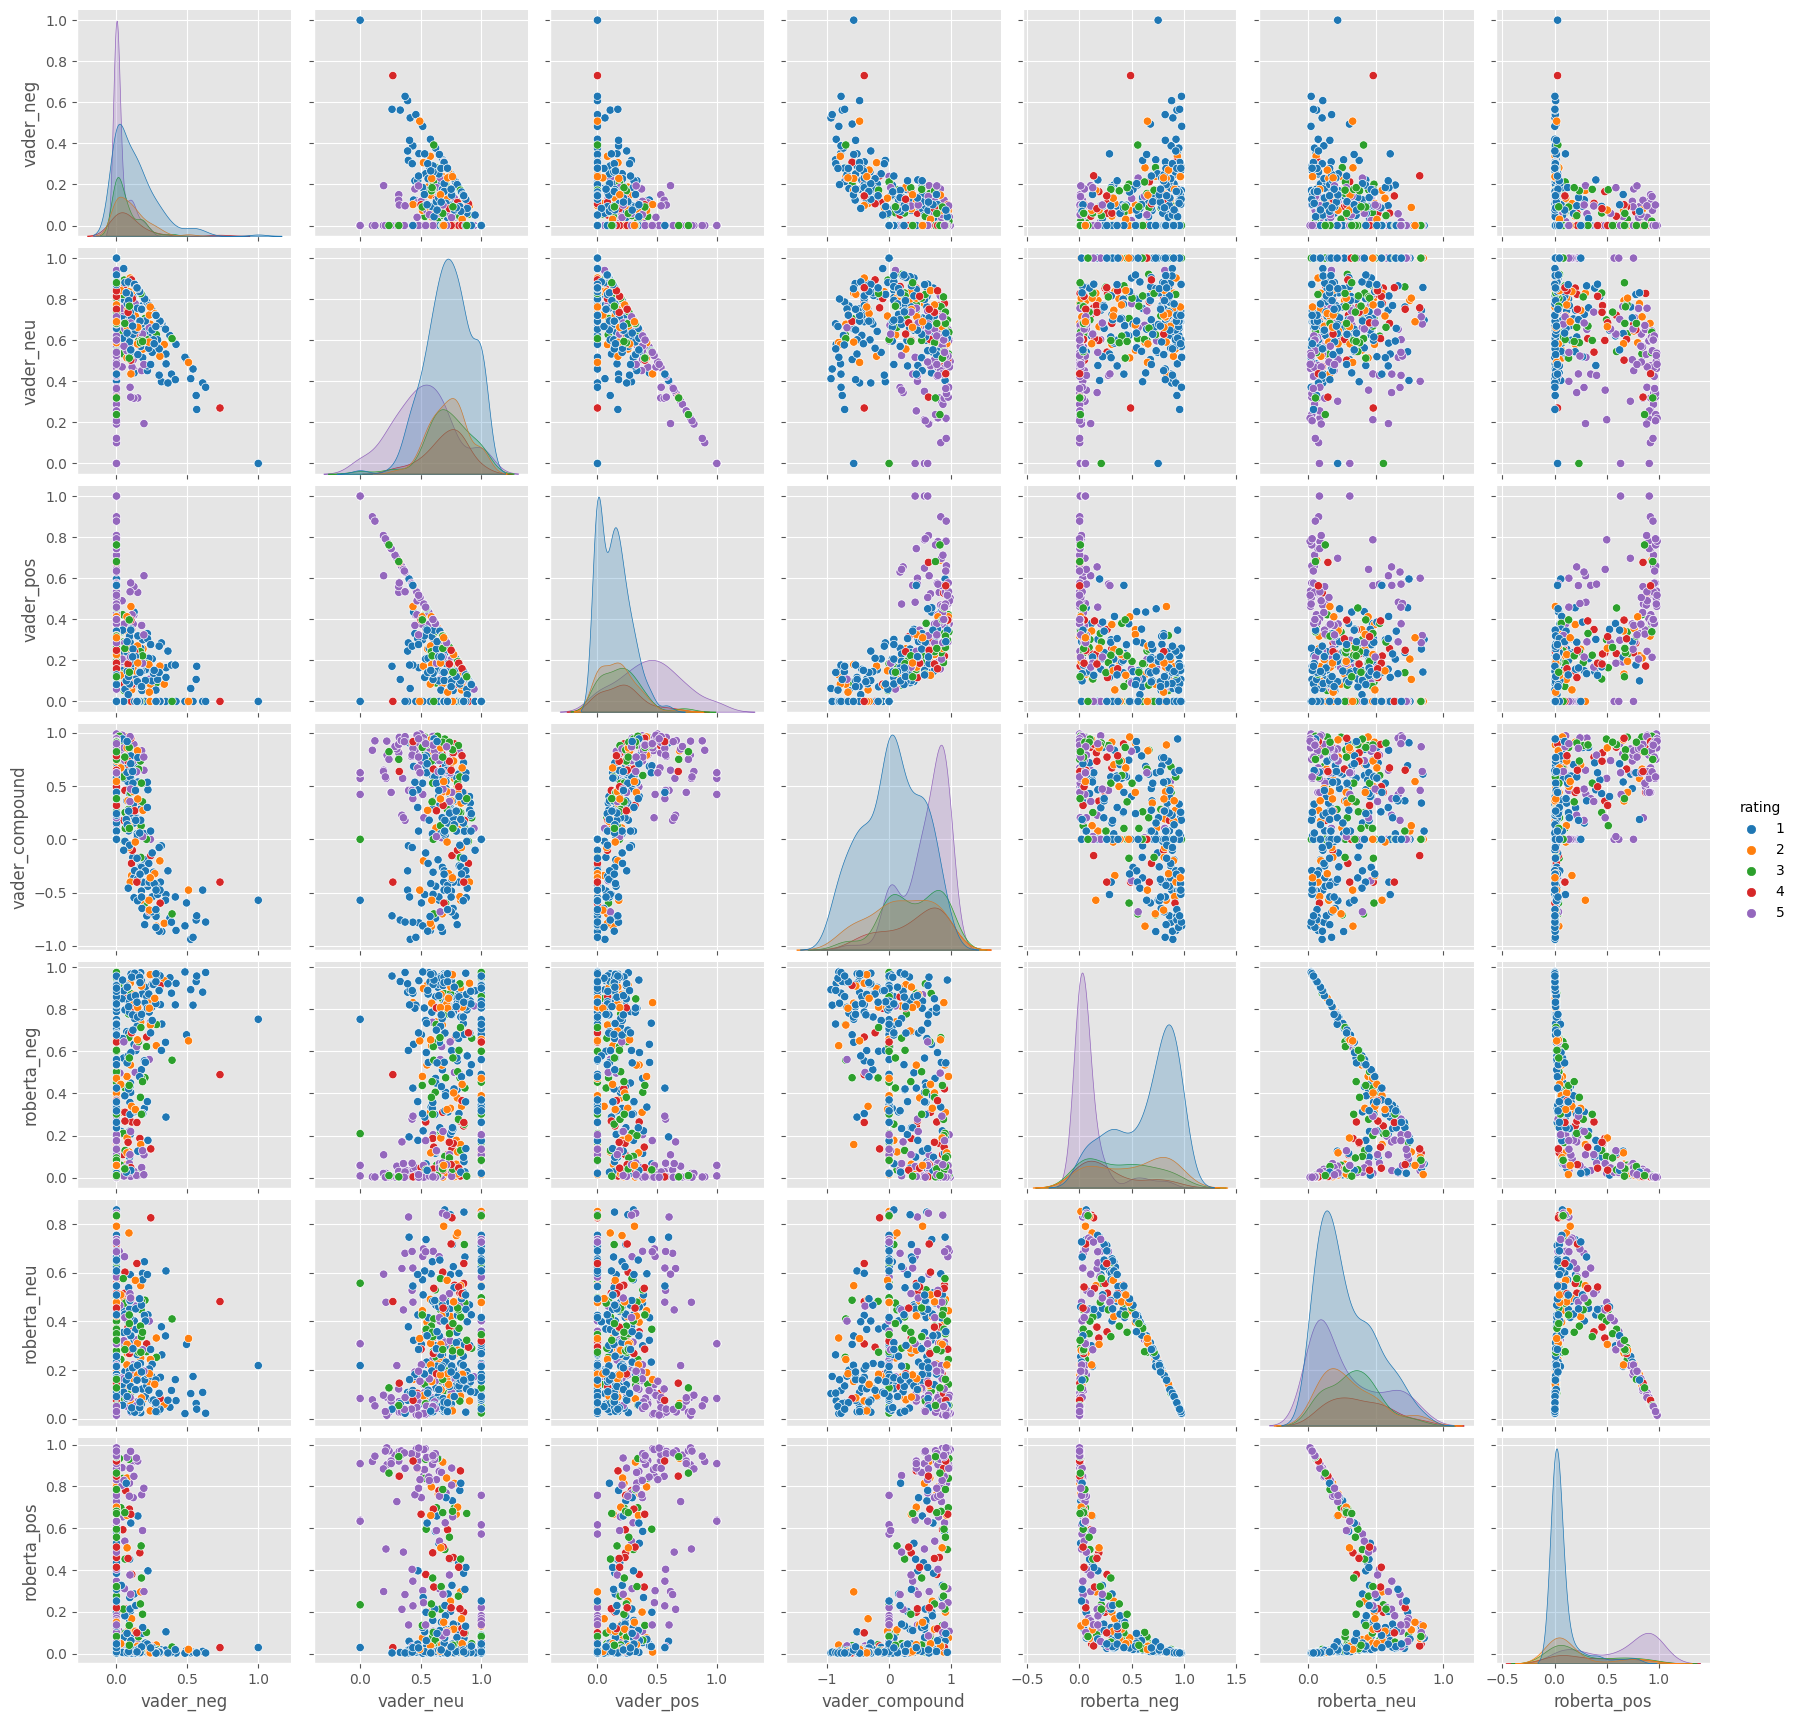

In [ ]:
sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'], hue ='rating', palette='tab10')

plt.show()

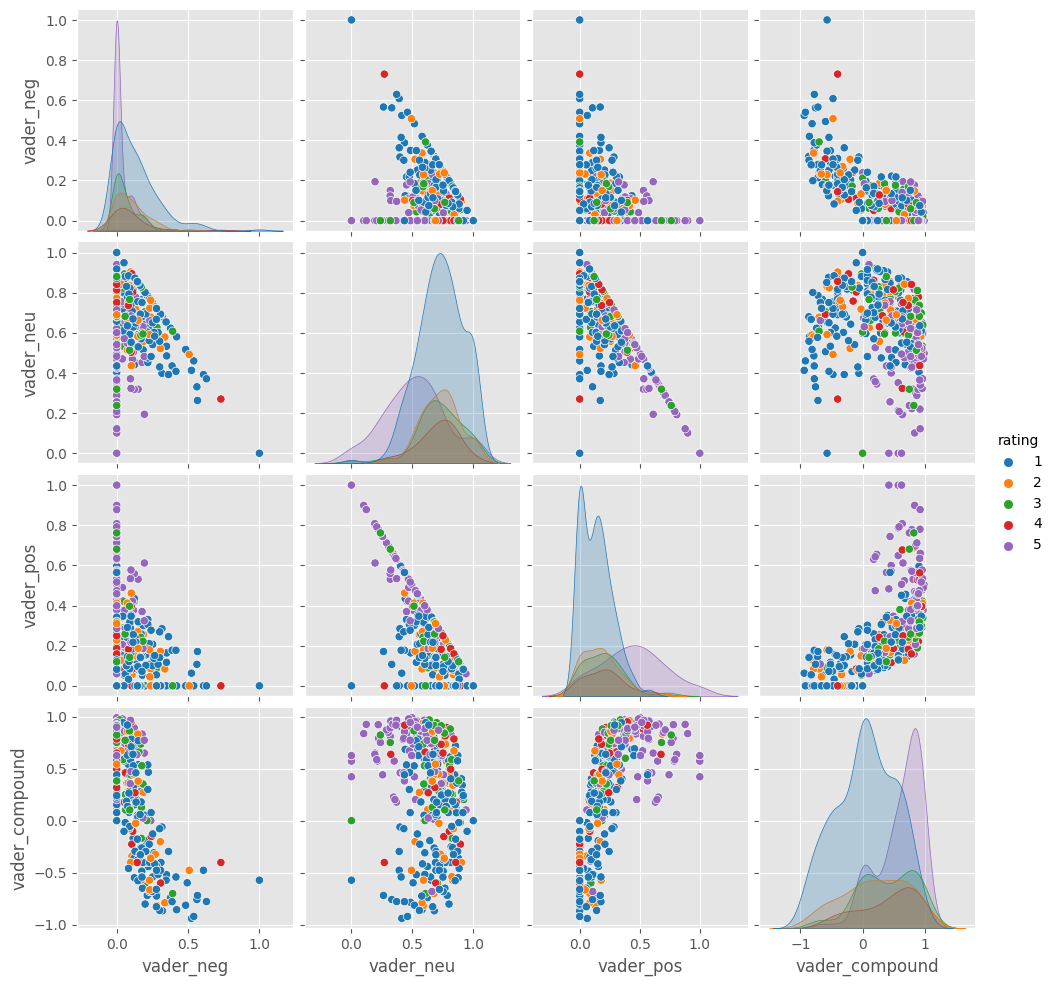

In [ ]:
sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound'], hue ='rating', palette='tab10')

plt.show()

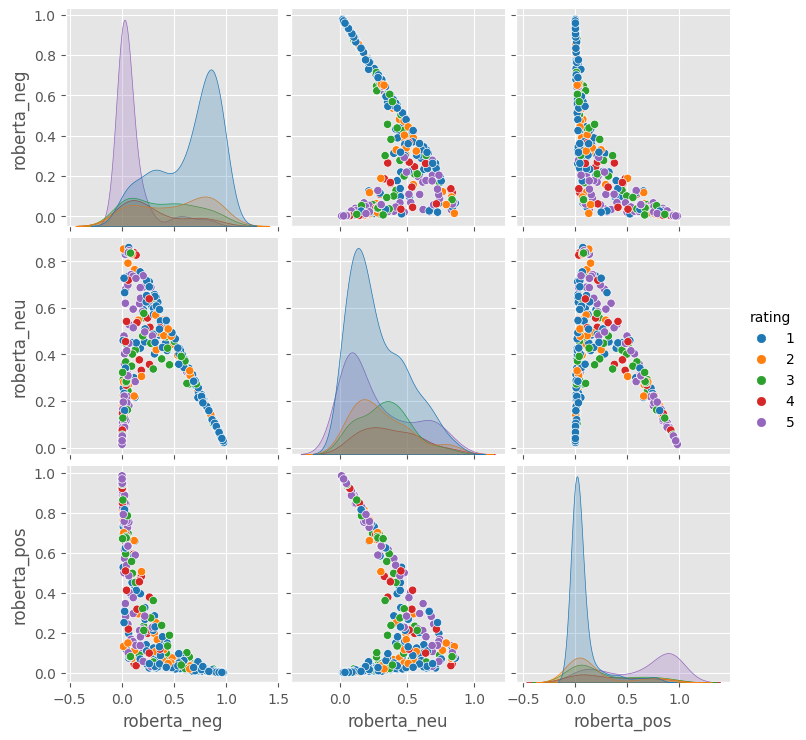

In [ ]:
sns.pairplot(data=results_df, vars=['roberta_neg', 'roberta_neu', 'roberta_pos'], hue ='rating', palette='tab10')

plt.show()

Review examples

In [ ]:
results_df.query('rating==1') \
    .sort_values('roberta_pos',ascending=False)['review'].values[0]

'im excited start something plaid system mobile phone doesnt allow add another bank able sign application online thats plaid worked dont know'

In [ ]:
results_df.query('rating==1') \
    .sort_values('vader_pos',ascending=False)['review'].values[0]

'online support says support respond like days later support give thats phone support emergencies'

negative sentiment 5 star

In [ ]:
results_df.query('rating==5') \
    .sort_values('roberta_neg',ascending=False)['review'].values[0]

'took months credit score points ive never used card signed june forgot recently looking credit report trying understand score went much getting worse based im giving stars takes time legit'

In [ ]:
results_df.query('rating==5') \
    .sort_values('vader_pos',ascending=False)['review'].values[0]

'excellent'

Extra : the transformer pipeline

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sent_pipeline("i love sentiment analysis")

[{'label': 'POSITIVE', 'score': 0.999736487865448}]

Now we did sentiment analysis on the whole, but now we are going to differentiate into different categories and then do sentiment analysis on it.
We will be dividing the dataframe into 4 dataframes based on:

**UI**

**Card**

**Bank**

App

In [ ]:
import pandas as pd
import re

# Assuming you have defined ui_ux_keywords
ui_ux_keywords = ['appearance','looking','looks','look', 'ui', 'ux', 'user interface', 'user experience', 'design', 'usability', 'interaction', 'gui', 'frontend', 'interface design']



# Define a regular expression pattern to match whole words
pattern = r'\b(?:' + '|'.join(ui_ux_keywords) + r')\b'

# Filter rows in the 'review' column that contain whole words from 'ui_ux_keywords'
ui_df = df[df['review'].str.lower().str.contains(pattern, case=False, na=False, flags=re.IGNORECASE)]


In [ ]:
ui_df

,review,rating,Id
1,took months credit score points ive never used...,5,2
21,love app bad credit like something stuff colle...,5,22
28,bad first impression using foldable tablet app...,1,29
35,issue able open app claiming device rooted des...,2,36
58,time application hang start black screen way m...,3,59
110,ive alot trouble installing app continues ask ...,1,111
118,never problems app great card helps credit ui ...,5,119
119,pretty bad make seem like anyone sign declined...,2,120
137,service works fine card nice looks app abysmal...,3,138
147,app modern look feel quite easy use,5,148


In [ ]:
ui_df.shape

(18, 3)

In [ ]:
# Assuming you have defined application_keywords
application_keywords = ['app', 'software', 'program', 'mobile app', 'desktop app', 'application software', 'computer program', 'software application', 'web app', 'mobile application']

# Define a regular expression pattern to match whole words
pattern = r'\b(?:' + '|'.join(application_keywords) + r')\b'

# Filter rows in the 'review' column that contain whole words from 'application_keywords'
app_df = df[df['review'].str.lower().str.contains(pattern, case=False, na=False, flags=re.IGNORECASE)]


In [ ]:
app_df

,review,rating,Id
2,love card everything half time app wont open r...,1,3
4,love bank app crashes asks many updates wont u...,3,5
5,install app hack contacts messages photos blac...,1,6
6,take cred news add zelle faster transactions u...,2,7
8,app works perfectly zfold bank almost years pr...,5,9
...,...,...,...
417,app needs accessibility tlc button top right w...,3,418
418,found way around white screen android login tr...,3,419
420,doesnt work app busted galaxy ultra cant ever ...,1,421
421,app joke works times rest time shows blank whi...,2,422


In [ ]:
# Assuming you have defined bank_keywords
bank_keywords = ['bank', 'banking', 'financial institution', 'credit union', 'savings and loan', 'lender', 'financial services', 'loan provider', 'branch', 'ATM', 'deposit', 'checking account', 'savings account', 'online banking', 'mobile banking']

# Define a regular expression pattern to match whole words
pattern = r'\b(?:' + '|'.join(bank_keywords) + r')\b'

# Filter rows in the 'review' column that contain whole words from 'bank_keywords'
bank_df = df[df['review'].str.lower().str.contains(pattern, case=False, na=False, flags=re.IGNORECASE)]


In [ ]:
bank_df

,review,rating,Id
4,love bank app crashes asks many updates wont u...,3,5
8,app works perfectly zfold bank almost years pr...,5,9
9,see many people leaving reviews dont understan...,5,10
10,ive seen really good things card personally us...,2,11
12,cheap disrespectful unprofessional customer se...,1,13
...,...,...,...
392,im excited start something plaid system mobile...,1,393
394,update apparently sign page overwhelmed new us...,4,395
396,straight doesnt work doesnt work td bank crede...,1,397
407,signed accout gave account info got deposit ac...,1,408


In [ ]:
#SENTIMENT FOR UI_DF

res1 = {}
for i, row in tqdm(ui_df.iterrows(), total=len(ui_df)):
    try:
        r = row['review']
        myid = row['Id']
        roberta_result = polarity_scores_roberta(r)
        res1[myid] = roberta_result
    except RuntimeError:
        print(f'Broke for id{myid}')

  0%|          | 0/18 [00:00<?, ?it/s]

In [ ]:
results_df_ui = pd.DataFrame(res1).T
results_df_ui = results_df_ui.reset_index().rename(columns={'index': 'Id'})
results_df_ui = results_df_ui.merge(ui_df, how='left')

In [ ]:
results_df_ui

,Id,roberta_neg,roberta_neu,roberta_pos,review,rating
0,2,0.869077,0.121778,0.009145,took months credit score points ive never used...,5
1,22,0.028813,0.155397,0.815790,love app bad credit like something stuff colle...,5
2,29,0.859459,0.125357,0.015184,bad first impression using foldable tablet app...,1
3,36,0.378658,0.482897,0.138445,issue able open app claiming device rooted des...,2
4,59,0.727273,0.252617,0.020110,time application hang start black screen way m...,3
5,111,0.876203,0.116016,0.007781,ive alot trouble installing app continues ask ...,1
6,119,0.009200,0.069607,0.921193,never problems app great card helps credit ui ...,5
7,120,0.831326,0.160985,0.007689,pretty bad make seem like anyone sign declined...,2
8,138,0.646109,0.273362,0.080529,service works fine card nice looks app abysmal...,3
9,148,0.007399,0.120520,0.872081,app modern look feel quite easy use,5


In [ ]:
#SENTIMENT FOR APP_DF

res2 = {}
for i, row in tqdm(app_df.iterrows(), total=len(app_df)):
    try:
        r = row['review']
        myid = row['Id']
        roberta_result = polarity_scores_roberta(r)
        res2[myid] = roberta_result
    except RuntimeError:
        print(f'Broke for id{myid}')

  0%|          | 0/221 [00:00<?, ?it/s]

In [ ]:
results_df_app = pd.DataFrame(res2).T
results_df_app = results_df_app.reset_index().rename(columns={'index': 'Id'})
results_df_app = results_df_app.merge(app_df, how='left')

In [ ]:
results_df_app

,Id,roberta_neg,roberta_neu,roberta_pos,review,rating
0,3,0.967254,0.029775,0.002971,love card everything half time app wont open r...,1
1,5,0.875004,0.112854,0.012142,love bank app crashes asks many updates wont u...,3
2,6,0.823931,0.170823,0.005247,install app hack contacts messages photos blac...,1
3,7,0.004480,0.181136,0.814384,take cred news add zelle faster transactions u...,2
4,9,0.010365,0.070570,0.919065,app works perfectly zfold bank almost years pr...,5
...,...,...,...,...,...,...
216,418,0.568426,0.391448,0.040126,app needs accessibility tlc button top right w...,3
217,419,0.006872,0.322712,0.670416,found way around white screen android login tr...,3
218,421,0.775476,0.192063,0.032462,doesnt work app busted galaxy ultra cant ever ...,1
219,422,0.058075,0.791961,0.149964,app joke works times rest time shows blank whi...,2


In [ ]:
#SENTIMENT FOR BANK_DF

res3 = {}
for i, row in tqdm(bank_df.iterrows(), total=len(bank_df)):
    try:
        r = row['review']
        myid = row['Id']
        roberta_result = polarity_scores_roberta(r)
        res3[myid] = roberta_result
    except RuntimeError:
        print(f'Broke for id{myid}')

  0%|          | 0/90 [00:00<?, ?it/s]

In [ ]:
results_df_bank = pd.DataFrame(res3).T
results_df_bank = results_df_bank.reset_index().rename(columns={'index': 'Id'})
results_df_bank = results_df_bank.merge(bank_df, how='left')

In [ ]:
results_df_bank

,Id,roberta_neg,roberta_neu,roberta_pos,review,rating
0,5,0.875004,0.112854,0.012142,love bank app crashes asks many updates wont u...,3
1,9,0.010365,0.070570,0.919065,app works perfectly zfold bank almost years pr...,5
2,10,0.203928,0.688921,0.107151,see many people leaving reviews dont understan...,5
3,11,0.063645,0.269942,0.666413,ive seen really good things card personally us...,2
4,13,0.935641,0.057919,0.006440,cheap disrespectful unprofessional customer se...,1
...,...,...,...,...,...,...
85,393,0.025985,0.158928,0.815088,im excited start something plaid system mobile...,1
86,395,0.365663,0.514919,0.119418,update apparently sign page overwhelmed new us...,4
87,397,0.904766,0.090920,0.004314,straight doesnt work doesnt work td bank crede...,1
88,408,0.812457,0.176780,0.010763,signed accout gave account info got deposit ac...,1


VISUALIZATION FOR UI_DF

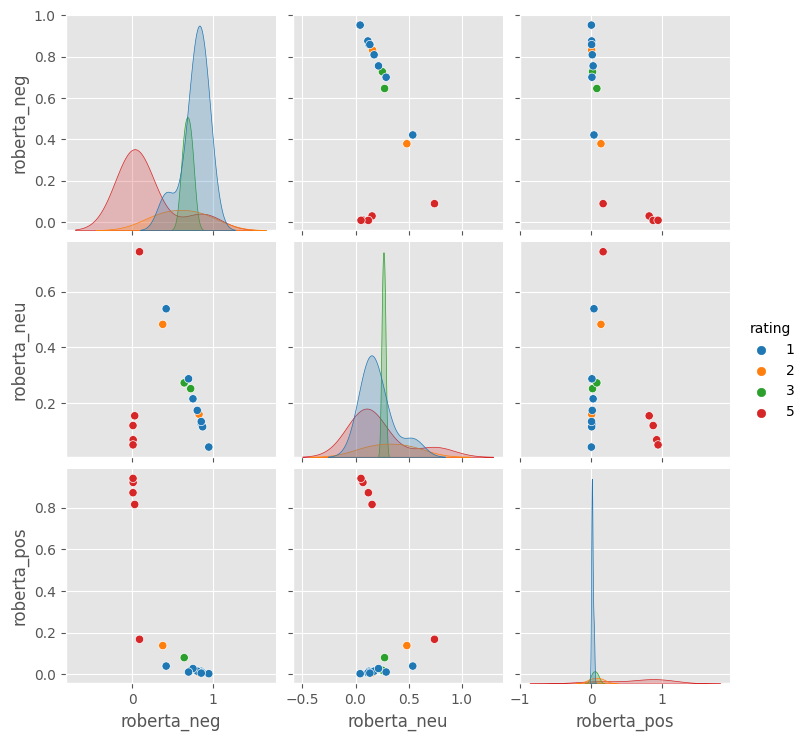

In [ ]:
sns.pairplot(data=results_df_ui, vars=['roberta_neg', 'roberta_neu', 'roberta_pos'], hue ='rating', palette='tab10')

plt.show()

VISUALIZATION FOR APP_DF

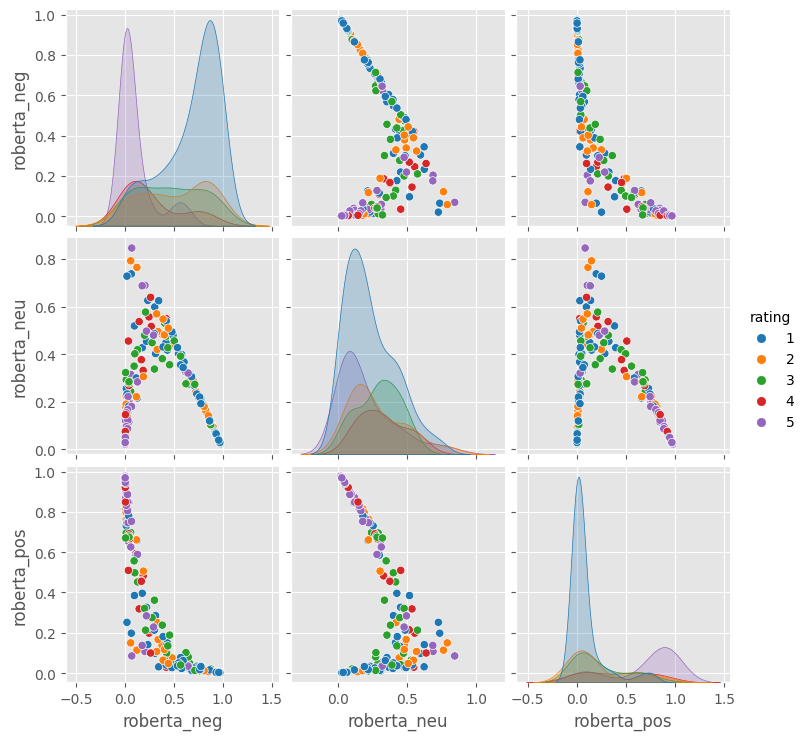

In [ ]:
sns.pairplot(data=results_df_app, vars=['roberta_neg', 'roberta_neu', 'roberta_pos'], hue ='rating', palette='tab10')

plt.show()


VISUALIZATION FOR BANK_DF

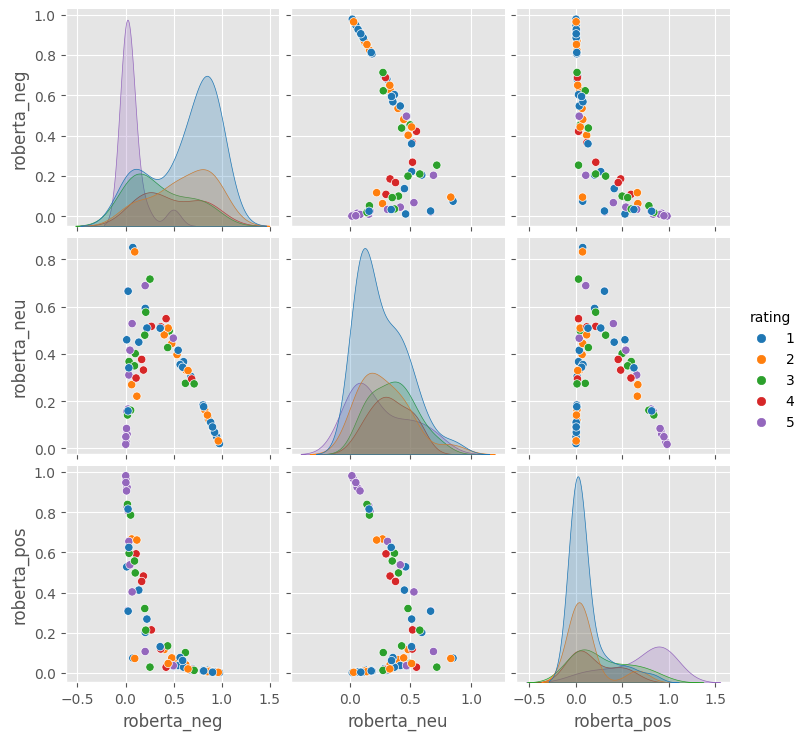

In [ ]:
sns.pairplot(data=results_df_bank, vars=['roberta_neg', 'roberta_neu', 'roberta_pos'], hue ='rating', palette='tab10')

plt.show()
